# 1. Walkthrough

### 1.1 Programming For Data Analytics and Data Preparation Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #heat map
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df=pd.read_csv("Population_Estimates_202309.csv")

In [3]:
df.head(4)
# Exploratore Data Analysis
# Observe the data by using the head function

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
0,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,-,Both sexes,Thousand,61.1
1,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,1,Male,Thousand,31.4
2,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,2,Female,Thousand,29.7
3,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,-,Both sexes,Thousand,NaN


In [4]:
df.tail(4)
# Exploratore Data Analysis
# Observe the data by using the tail function

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
5990,PEA01,Population Estimates (Persons in April),2023,2023,630,85 years and over,2,Female,Thousand,53.9
5991,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,-,Both sexes,Thousand,5281.6
5992,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,1,Male,Thousand,2606.2
5993,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,2,Female,Thousand,2675.4


In [5]:
df.dtypes
# Used to retrieve the data types of each column in a DataFrame

STATISTIC           object
STATISTIC Label     object
TLIST(A1)            int64
Year                 int64
C02076V02508        object
Age Group           object
C02199V02655        object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

In [6]:
df.count()
# It provides a count of the valid data points in each column.

STATISTIC          5994
STATISTIC Label    5994
TLIST(A1)          5994
Year               5994
C02076V02508       5994
Age Group          5994
C02199V02655       5994
Sex                5994
UNIT               5994
VALUE              5880
dtype: int64

In [7]:
df.describe(include=object)
# It provides summary statistics specifically for the columns containing data types. This can be useful to understand the characteristics of categorical or textual data.

,STATISTIC,STATISTIC Label,C02076V02508,Age Group,C02199V02655,Sex,UNIT
count,5994,5994,5994,5994,5994,5994,5994
unique,1,1,27,27,3,3,1
top,PEA01,Population Estimates (Persons in April),200,Under 1 year,-,Both sexes,Thousand
freq,5994,5994,222,222,1998,1998,5994


In [8]:
df.info()
# Used to obtain a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        5994 non-null   object 
 1   STATISTIC Label  5994 non-null   object 
 2   TLIST(A1)        5994 non-null   int64  
 3   Year             5994 non-null   int64  
 4   C02076V02508     5994 non-null   object 
 5   Age Group        5994 non-null   object 
 6   C02199V02655     5994 non-null   object 
 7   Sex              5994 non-null   object 
 8   UNIT             5994 non-null   object 
 9   VALUE            5880 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 468.4+ KB


In [9]:
df = df.drop(['STATISTIC', 'STATISTIC Label', 'Year', 'C02076V02508', 'UNIT', 'C02199V02655'], axis=1)
df.head(4)

# Dropping irrelevant columns

,TLIST(A1),Age Group,Sex,VALUE
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN


In [10]:
df = df.rename(columns={'TLIST(A1)':'Year', 'C02076V02508' : 'Age Group_Code', 'Age Group' : 'Age_Group', 'C02199V02655' : 'Sex_Code', 'UNIT' : 'Unit', 'VALUE' : 'Value', 'C02199V02655' : 'Sex_Code', 'UNIT' : 'Unit', 'VALUE' : 'Value'})
df.head(5)

#Renaming the column names


,Year,Age_Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN


In [11]:
print(df.isnull().sum())

# Total number of missing values per column

Year           0
Age_Group      0
Sex            0
Value        114
dtype: int64


In [12]:
df.dropna(axis=0,inplace=True)
df.head(7)
# Removing rows with missing values

,Year,Age_Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
6,1950,0 - 14 years,Both sexes,851.2
7,1950,0 - 14 years,Male,434.6
8,1950,0 - 14 years,Female,416.6
9,1950,1 - 4 years,Both sexes,249.1


In [13]:
df.shape
# Used to determine the dimensions of a DataFrame.

(5880, 4)

In [14]:
df.count()
# In order to have a view of the valid data right after the data was cleaned.

Year         5880
Age_Group    5880
Sex          5880
Value        5880
dtype: int64

<Axes: xlabel='Value'>

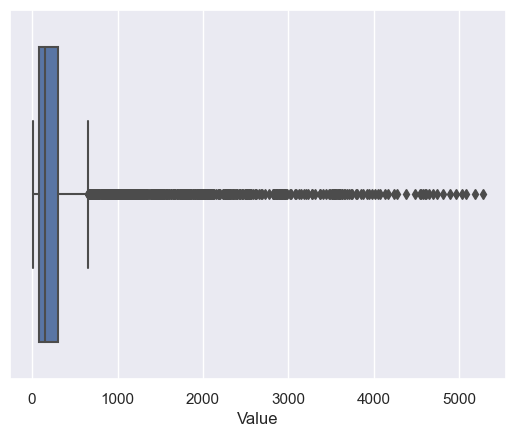

In [15]:
sns.boxplot(x=df["Value"]) 
# Detecting Outliers


<Axes: xlabel='Year'>

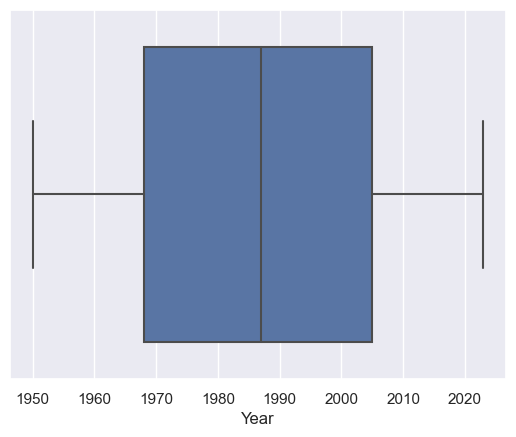

In [16]:
sns.boxplot(x=df["Year"]) 
# Detecting Outliers

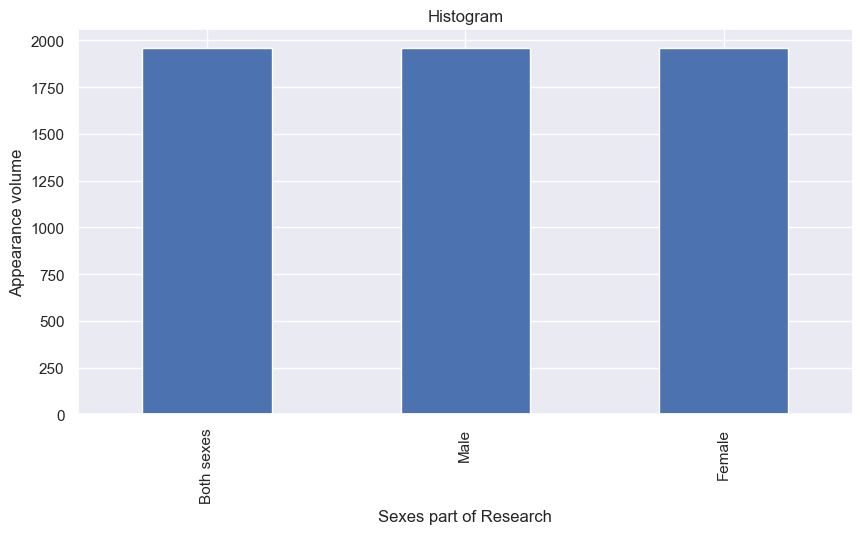

In [17]:
#Histogram

df.Sex.value_counts().nlargest(10).plot(kind="bar", figsize=(10,5))
plt.title("Histogram")
plt.ylabel("Appearance volume")
plt.xlabel("Sexes part of Research"); 

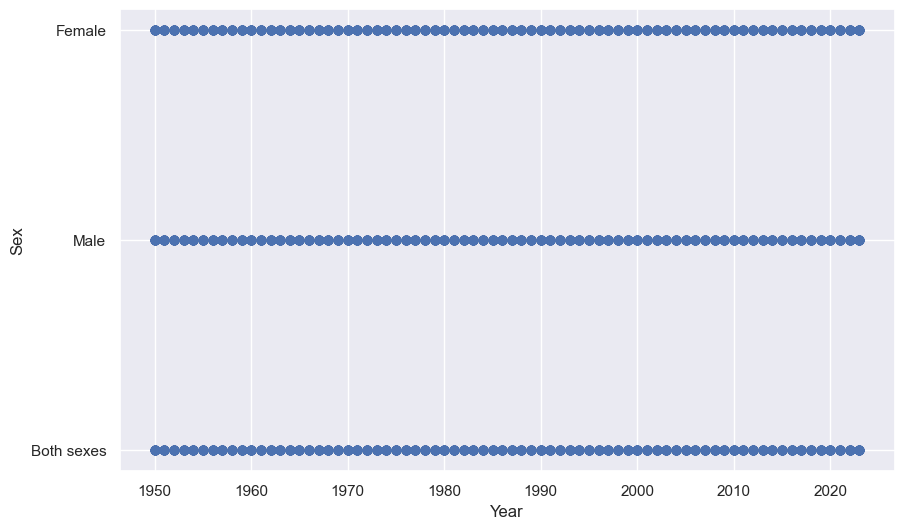

In [18]:
# Scatterplot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Year"], df["Sex"])
ax.set_xlabel("Year")
ax.set_ylabel("Sex")
plt.show() 

C:\Users\Bruno\AppData\Local\Temp\ipykernel_16852\648452270.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,Year,Value
Year,1.000000,0.110005
Value,0.110005,1.000000


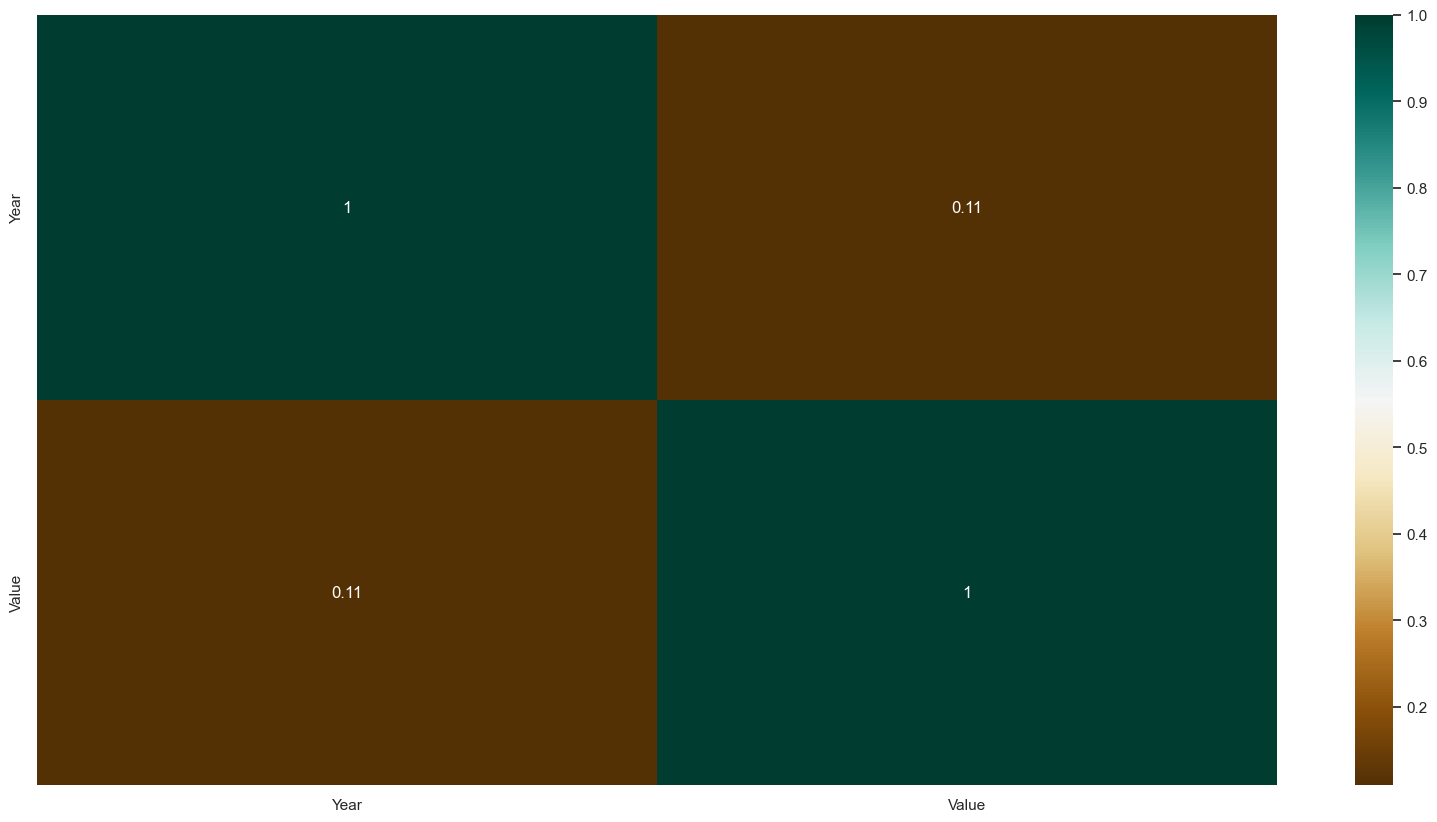

In [19]:
# Finding the relations between the variables

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

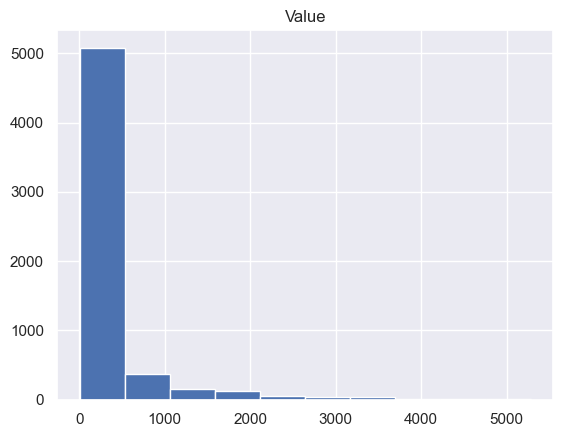

In [20]:
#histogram of the frequency
df.hist(column="Value") 

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

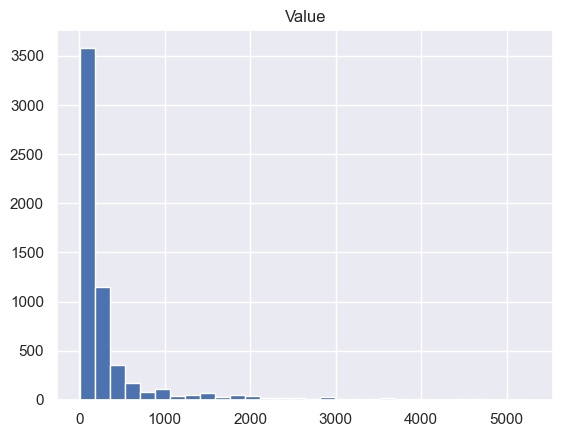

In [21]:
#histogram of the frequency
df.hist(column="Value", bins=30) 

C:\Users\Bruno\AppData\Local\Temp\ipykernel_16852\989524671.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value)


<Axes: xlabel='Value', ylabel='Density'>

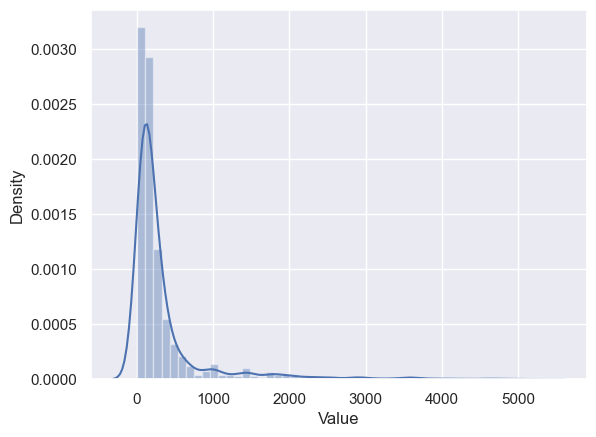

In [22]:
sns.distplot(df.Value) 


C:\Users\Bruno\AppData\Local\Temp\ipykernel_16852\3036903171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value, kde=False)


<Axes: xlabel='Value'>

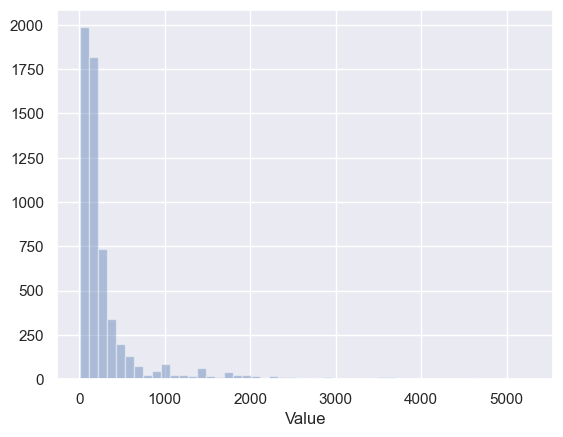

In [23]:
sns.distplot(df.Value, kde=False) 


C:\Users\Bruno\AppData\Local\Temp\ipykernel_16852\1162194159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value, kde=False, bins=100)


<Axes: xlabel='Value'>

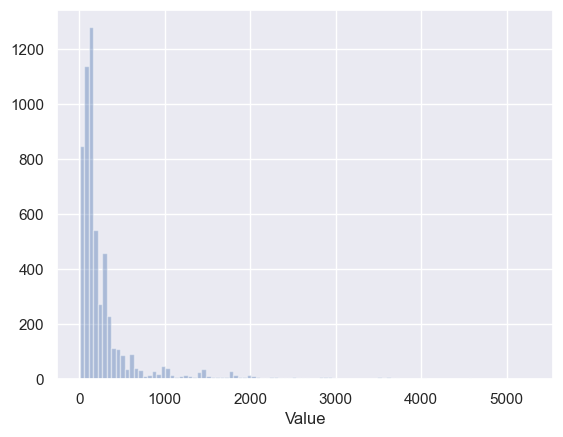

In [24]:
sns.distplot(df.Value, kde=False, bins=100) 


C:\Users\Bruno\AppData\Local\Temp\ipykernel_16852\2562091999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.Value), kde=False)


<Axes: xlabel='Value'>

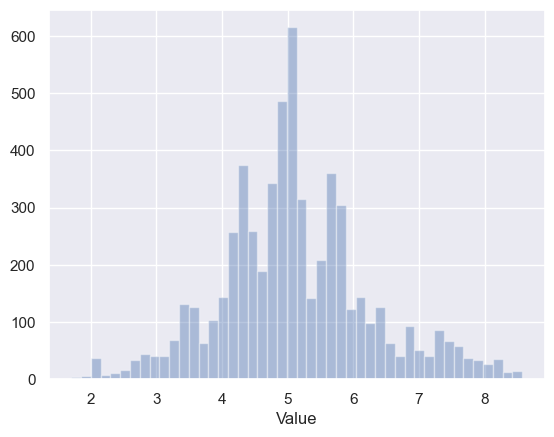

In [25]:
sns.distplot(np.log(df.Value), kde=False) 


In [26]:
# Bar Plot and Calculating the Mean Sex Distribution

In [27]:
df.Sex.unique() 

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [28]:
df.Value.unique() 

array([  61.1,   31.4,   29.7, ..., 5281.6, 2606.2, 2675.4])

In [29]:
cut_count_table = pd.crosstab(index=df['Sex'],columns='Value') 
cut_count_table

col_0,Value
Sex,
Both sexes,1960
Female,1960
Male,1960


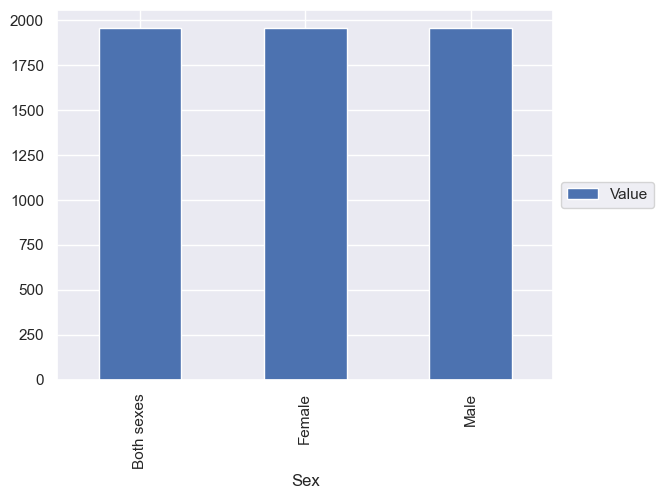

In [30]:
cut_count_table.plot(kind='bar') 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [31]:
from numpy import median, mean
sns.set(style="whitegrid")

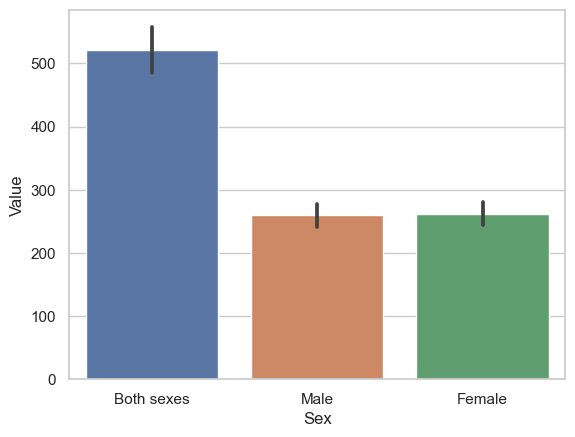

In [32]:
ax = sns.barplot(x="Sex", y="Value", data=df,estimator=mean)

#### Heat Map

### What is the current population of Ireland? - Visualization

In [33]:
df.tail(3)
# Exploratore Data Analysis
# Observe the data by using the tail function

,Year,Age_Group,Sex,Value
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2
5993,2023,All ages,Female,2675.4


In [34]:
# Assuming 'Year' is the column with the year and 'Data' is the column you want to work with
year_to_isolate = 2023  # Replace with the year you want to isolate

# Filter the DataFrame to isolate the data for the specific year
data_for_specific_year = df[df['Year'] == year_to_isolate]
data_for_specific_year

,Year,Age_Group,Sex,Value
5913,2023,Under 1 year,Both sexes,55.7
5914,2023,Under 1 year,Male,27.4
5915,2023,Under 1 year,Female,28.3
5916,2023,0 - 4 years,Both sexes,293.8
5917,2023,0 - 4 years,Male,149.2
...,...,...,...,...
5989,2023,85 years and over,Male,33.1
5990,2023,85 years and over,Female,53.9
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


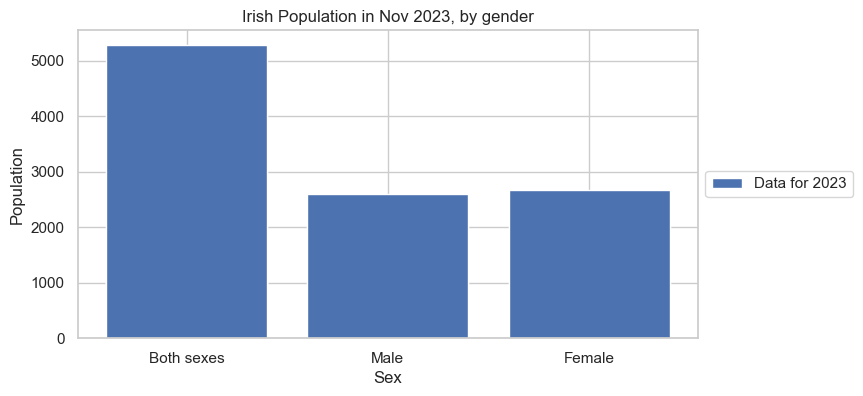

In [35]:
# Create a line plot of the data for the specific year

plt.figure(figsize=(8, 4))  # Set the figure size
plt.bar(data_for_specific_year['Sex'], data_for_specific_year['Value'], label='Data for 2023')
plt.xlabel('Sex')
plt.ylabel('Population')
plt.title('Irish Population in Nov 2023, by gender')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



#### How has it changed over the past decade? 

In [36]:
def visualize_changes_and_growth(data):
    filtered_data = data[(data["Year"] >= 1950) & (data["Year"] <= 2023)]
    pivoted_data = filtered_data.pivot(index="Year", columns="Sex", values="Value")
    plt.figure(figsize=(6, 3))
    for sex in pivoted_data.columns:
        initial_value = pivoted_data[sex].iloc[0]
        percentage_growth = (pivoted_data[sex] - initial_value) / initial_value * 100
        plt.plot(pivoted_data.index, percentage_growth, label=sex)

    plt.title("Percentage of Growth by Year (1950-2023)")
    plt.xlabel("Year")
    plt.ylabel("Percentage Growth")
    plt.legend()
    plt.grid(True)
    plt.show()


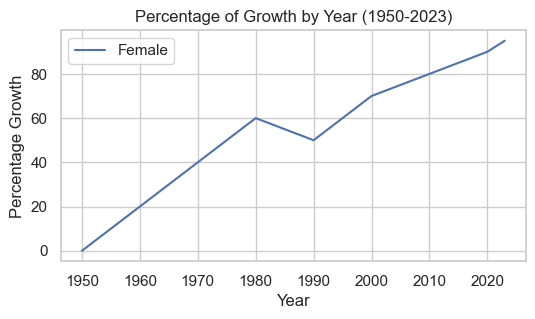

In [37]:
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})
visualize_changes_and_growth(data)


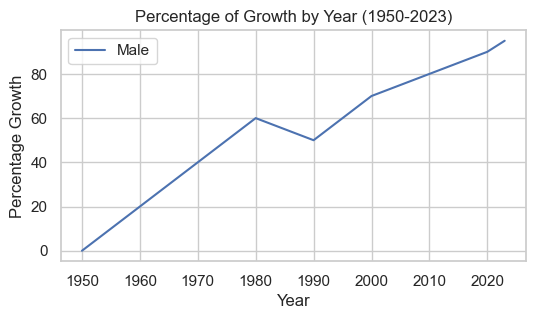

In [38]:

data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})
visualize_changes_and_growth(data)


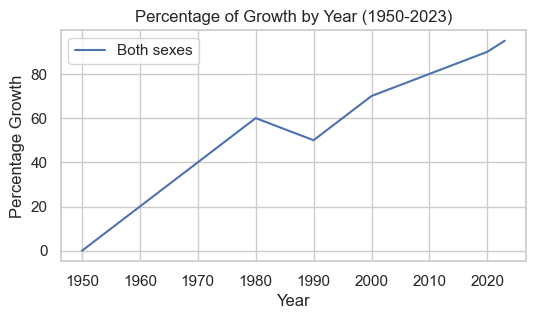

In [39]:
 
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})
visualize_changes_and_growth(data)


In [40]:
def visualize_population_changes(data):
    filtered_data = data[(data["Year"] >= 1950) & (data["Year"] <= 2023)]
    pivoted_data = filtered_data.pivot(index="Year", columns="Sex", values="Value")
    plt.figure(figsize=(10, 4))
    for sex in pivoted_data.columns:
        plt.plot(pivoted_data.index, pivoted_data[sex], label=sex)
    plt.title("Population Changes by Year (1950-2023)")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(True)
    plt.show()


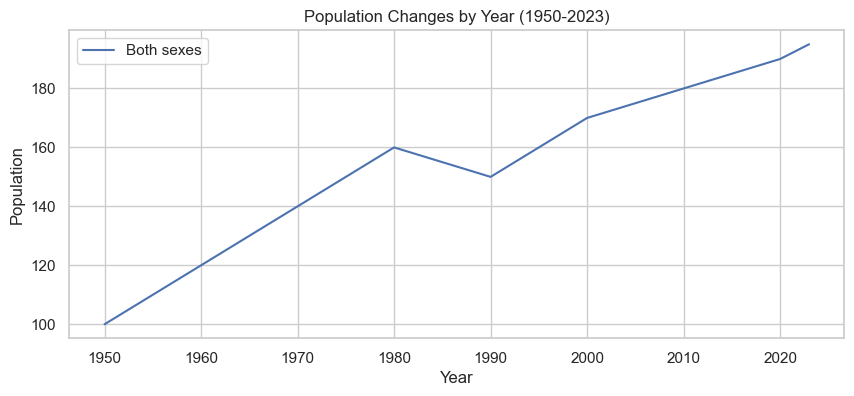

In [41]:
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})
visualize_population_changes(data)


### Heat Map

In [42]:
def plot_heatmap(csv_file):

    pivot_table = df.pivot_table(index='Year', columns='Sex', values='Value')
    
    # Create the heatmap using Seaborn
    plt.figure(figsize=(25, 18))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
    
    # Customize the plot
    plt.title('Population Estimates Heatmap')
    plt.xlabel('Sex')
    plt.ylabel('Year')
    
    # Show the heatmap
    plt.show()


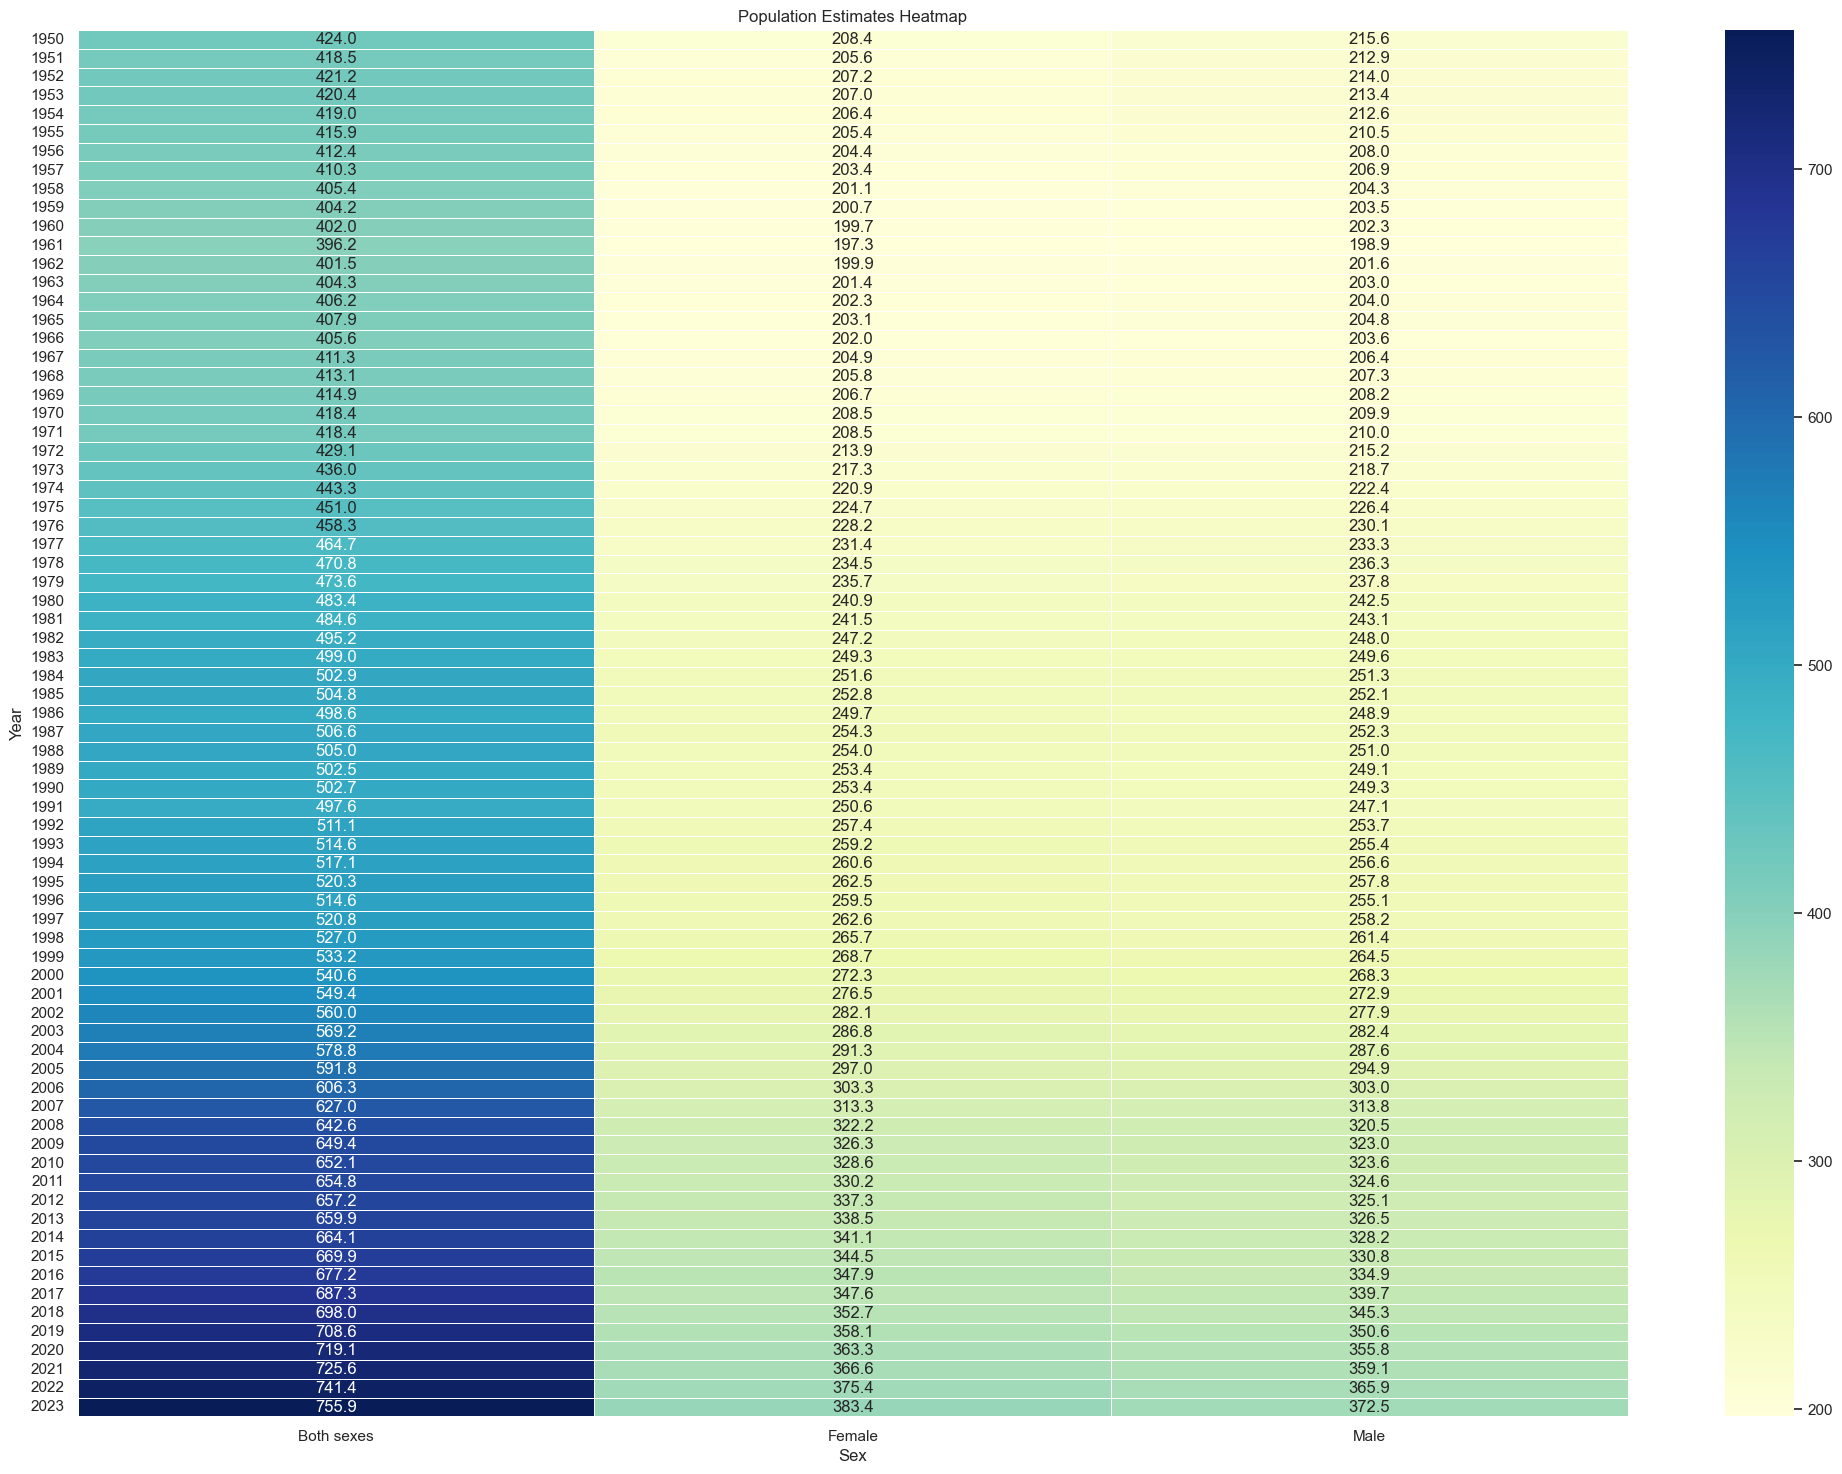

In [43]:
csv_file = 'Population_Estimates_202309.CSV'
plot_heatmap(csv_file)


### 1.2 Machine Learning and Statistics for Data Analytics

In [44]:
df.describe(include=object)
# It provides summary statistics specifically for the columns containing data types. This can be useful to understand the characteristics of categorical or textual data.

,Age_Group,Sex
count,5880,5880
unique,27,3
top,Under 1 year,Both sexes
freq,222,1960


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
df.head(4)
# Exploratore Data Analysis
# Observe the data by using the head function

,Year,Age_Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
6,1950,0 - 14 years,Both sexes,851.2


In [47]:


def population_growth_projection(file_path):
    # Load the data from the CSV file
    data = pd.read_csv('Population_Estimates_202309.csv')
    
    # Filter the data for years between 1950 and 2023 and both sexes
    filtered_data = data[(data['Year'] >= 1950) & (data['Year'] <= 2023) & (data['Sex'].isin(['Male', 'Female']))]

    # Pivot the data to have 'Year' as the index and 'Sex' as columns
    pivoted_data = filtered_data.pivot(index='Year', columns='Sex', values='Value')

    # Create a linear regression model for both sexes
    model_male = LinearRegression()
    model_female = LinearRegression()

    # Train the models
    years = np.array(pivoted_data.index).reshape(-1, 1)
    male_values = np.array(pivoted_data['Male']).reshape(-1, 1)
    female_values = np.array(pivoted_data['Female']).reshape(-1, 1)

    model_male.fit(years, male_values)
    model_female.fit(years, female_values)

    # Create projections for the next 2 decades (2023 to 2043)
    future_years = np.arange(2023, 2044).reshape(-1, 1)
    male_projection = model_male.predict(future_years)
    female_projection = model_female.predict(future_years)

    # Plot the projections
    plt.figure(figsize=(10, 6))
    plt.plot(pivoted_data.index, pivoted_data['Male'], label='Male')
    plt.plot(pivoted_data.index, pivoted_data['Female'], label='Female')
    plt.plot(future_years, male_projection, linestyle='--', label='Male Projection')
    plt.plot(future_years, female_projection, linestyle='--', label='Female Projection')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Population Growth Projection')
    plt.legend()
    plt.grid()
    plt.show()

# Usage
population_growth_projection("Population_Estimates_202309.csv")


KeyError: 'Value'

In [ ]:
pip install scikit-learn matplotlib
